https://www.quantconnect.com/terminal/processCache/?request=embedded_backtest_98cf554d6f396c80acc737ddc2e363a5.html is an example that implements all of the QuantConnect API in vanilla Python to demonstrate the JSON calls and responses.

In [1]:
url_readBacktest        = f"https://www.quantconnect.com/api/v2/backtests/read"
url_readProject         = f"https://www.quantconnect.com/api/v2/projects/read"
url_listProjectBacktest = f"https://www.quantconnect.com/api/v2/backtests/list"

In [ ]:
project_IDs = [19016182, 19014068, 19015686, 19015442]

In [ ]:
# 19015686: {'YTD': '', '2023': '', '5YR': ''},

projects = {
    19016182: {'YTD': '470023a5c1f9a22a0f4829c35679f41d', '2023': '082e71846f6294125674d0fba01cb279', '5YR': 'fe286f90bb0da4738404135abd17136d'},

    19014068: {'YTD': '30f0c685c6b86c3a87e41ba814ac2d20', '2023': 'e2c3863dd8775420a9b56d0146900536', '5YR': 'ec972b6296554776191667a53ecdf904'},

    19015686: {'YTD': '517b08db7d506001db5992acbf211144', '2023': '1c1f0c9bbdf39a5498b7479e2849d8da', '5YR': '9fefc93b33716b3c3c225bab8700c479'},

    19015442: {'YTD': '6fc203bdcc79b85620ab20c5fb8a6f44', '2023': '4f7ad23a630e2aeecf363742972bfeff', '5YR': '216a792374258375a8ec0ea180dae529'},   
}


In [2]:
# Your QuantConnect API credentials
USER_ID = '92090'
API_TOKEN = '7df20f89e389d894c09528956e8bbd1c8a76946c12d56dd8624a6705825243ef'

import requests
import hashlib
import time
import base64
import pandas as pd
pd.set_option('display.max_columns', None)

# Function to create headers with appropriate authentication
def get_authenticated_headers():
    timestamp = str(int(time.time()))
    data_string = f"{API_TOKEN}:{timestamp}"
    hashed_token = hashlib.sha256(data_string.encode('utf-8')).hexdigest()
    auth_string = f"{USER_ID}:{hashed_token}"
    api_token = base64.b64encode(auth_string.encode('utf-8')).decode('ascii')
    return {
        'Authorization': f'Basic {api_token}',
        'Timestamp': timestamp
    }

### List Backtests by providing ProjectID

['backtestId', 'status', 'name', 'note', 'created', 'completed', 'progress', 'result', 'error', 'stacktrace', 'projectId', 'optimizationId', 'sparkline', 'sharpeRatio', 'alpha', 'beta', 'compoundingAnnualReturn', 'drawdown', 'lossRate', 'netProfit', 'parameters', 'psr', 'securityTypes', 'sortinoRatio', 'tradeableDates', 'trades', 'treynorRatio', 'winRate', 'outOfSampleMaxEndDate', 'outOfSampleDays', 'parameterSet', 'snapshotId', 'nodeName', 'tags'])

In [8]:
# https://www.quantconnect.com/docs/v2/cloud-platform/api-reference/backtest-management/list-backtests

def list_backtests(project_id):
    response = requests.post(url_listProjectBacktest, headers=get_authenticated_headers(), data={'projectId': project_id, 'includeStatistics': True})
    if response.status_code == 200:
        return response.json().get('backtests', [])
    else:
        print("Failed to list backtests:", response.status_code, response.text)
        return []
    
backtests = list_backtests(19014068)
backtest_metrics = ['backtestId', 'alpha',  'beta', 'compoundingAnnualReturn', 'drawdown', 'lossRate', 'netProfit', 'parameters', 'psr', 'sortinoRatio', 'trades' ,'treynorRatio', 'winRate'] 

df = pd.DataFrame([[bkt.get(metric, None) for metric in backtest_metrics] for bkt in backtests], columns=backtest_metrics)
df.index = [bkt['name'] for bkt in backtests]
df


,backtestId,alpha,beta,compoundingAnnualReturn,drawdown,lossRate,netProfit,parameters,psr,sortinoRatio,trades,treynorRatio,winRate
5YR,ec972b6296554776191667a53ecdf904,-0.078,-0.012,-7.819,37.8,53.00,-36.614,0,0.000,-2.081,49252,6.387,47.00
2023,e2c3863dd8775420a9b56d0146900536,-0.046,-0.015,0.535,5.0,-0.03,0.532,0,14.856,NaN,8996,3.270,0.03
YTD,30f0c685c6b86c3a87e41ba814ac2d20,-0.154,-0.012,-14.237,9.5,55.00,-8.763,0,0.077,-3.220,5252,13.391,45.00


### Read Backtests
https://www.quantconnect.com/docs/v2/cloud-platform/api-reference/backtest-management/read-backtest/backtest-statistics

['note', 'name', 'organizationId', 'projectId', 'completed', 'optimizationId', 'backtestId', 'tradeableDates', 'researchGuide', 'backtestStart', 'backtestEnd', 'created', 'snapshotId', 'status', 'error', 'stacktrace', 'progress', 'hasInitializeError', 'charts', 'parameterSet', 'rollingWindow', 'runtimeStatistics', 'statistics', 'totalPerformance', 'nodeName', 'outOfSampleMaxEndDate', 'outOfSampleDays'])

In [104]:
def fetch_backtest_result(project_id, backtest_id, key = None):
    response = requests.post(url_readBacktest, headers=get_authenticated_headers(), data={'projectId': project_id, 'backtestId': backtest_id})
    if response.status_code == 200:
        
        if key is not None:
            return response.json()['backtest'][key]
        else:
            return response.json()['backtest']
    else:
        print("Failed to retrieve backtest results:", response.status_code, response.text)
        return {}
    
backtest_result = fetch_backtest_result(project_id=19016182, backtest_id='fe286f90bb0da4738404135abd17136d')

In [105]:
backtest_result.keys()

dict_keys(['note', 'name', 'organizationId', 'projectId', 'completed', 'optimizationId', 'backtestId', 'tradeableDates', 'researchGuide', 'backtestStart', 'backtestEnd', 'created', 'snapshotId', 'status', 'error', 'stacktrace', 'progress', 'hasInitializeError', 'charts', 'parameterSet', 'rollingWindow', 'runtimeStatistics', 'statistics', 'totalPerformance', 'nodeName', 'outOfSampleMaxEndDate', 'outOfSampleDays'])

In [231]:
fetch_project_details(backtest_result['projectId'])['name']

'QP_97HalfDayReversal'

In [184]:
backtest_result['charts'].keys()

dict_keys(['Strategy Equity', 'Benchmark', 'Portfolio Margin', 'Assets Sales Volume', 'Portfolio Turnover', 'Capacity', 'Exposure', 'Drawdown'])

In [185]:
backtest_result['charts']['Benchmark']

{'name': 'Benchmark'}

In [187]:
backtest_result['charts']['Strategy Equity'].keys()

dict_keys(['name', 'chartType', 'series'])

In [188]:
backtest_result['charts']['Strategy Equity']['name']

'Strategy Equity'

In [189]:
backtest_result['charts']['Strategy Equity']['chartType']

0

In [191]:
backtest_result['charts']['Strategy Equity']['series'].keys()

dict_keys(['Equity', 'Return'])

In [193]:
backtest_result['charts']['Strategy Equity']['series']['Equity'].keys()

dict_keys(['name', 'unit', 'index', 'seriesType', 'values'])

In [209]:
backtest_result['charts']['Strategy Equity']['series']['Return'].keys()

dict_keys(['name', 'unit', 'index', 'seriesType', 'values', 'color', 'scatterMarkerSymbol'])

In [194]:
backtest_result['charts']['Strategy Equity']['series']['Equity']['unit']

'$'

In [195]:
backtest_result['charts']['Strategy Equity']['series']['Equity']['seriesType']

2

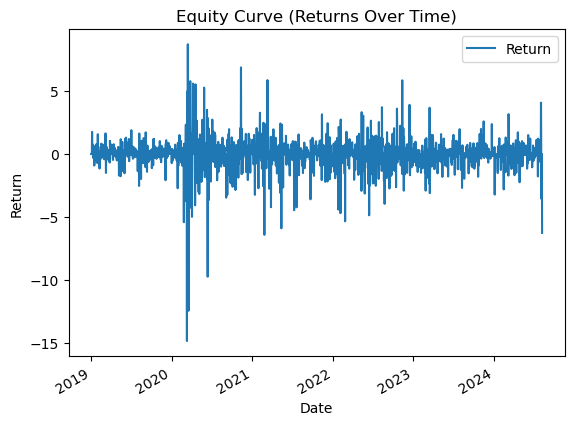

In [210]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'values' contains data points for the returns
# Sample structure: [[timestamp, value], [timestamp, value], ...]
returns_data = backtest_result['charts']['Strategy Equity']['series']['Return']['values']

# Convert to DataFrame
returns_df = pd.DataFrame(returns_data, columns=['Timestamp', 'Return'])

# Convert Unix timestamps to human-readable dates
returns_df['Date'] = pd.to_datetime(returns_df['Timestamp'], unit='s')

# Plot the returns
returns_df.plot(x='Date', y='Return', title='Equity Curve (Returns Over Time)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()


<Axes: title={'center': 'Equity Curve Over Time'}, xlabel='Date'>

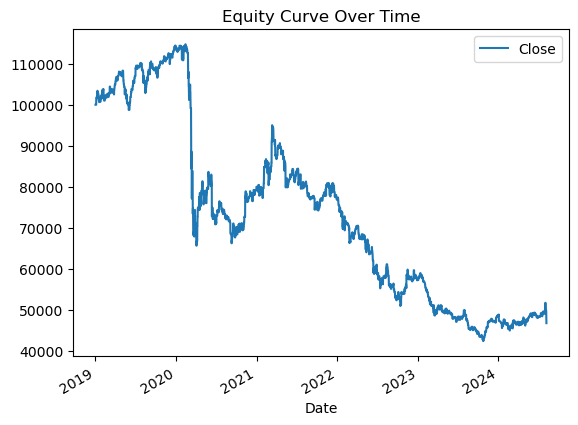

In [218]:
equity_values = backtest_result['charts']['Strategy Equity']['series']['Equity']['values']
df = pd.DataFrame(equity_values, columns=['Timestamp', 'Open', 'High', 'Low', 'Close'])
df['Date'] = pd.to_datetime(df['Timestamp'], unit='s')

# df = df[['Date', 'Starting Equity', 'Minimum Equity', 'Maximum Equity', 'Ending Equity']]
df.index = df.Date
df.plot(x='Date', y='Close', title='Equity Curve Over Time')

In [228]:
# equity_values

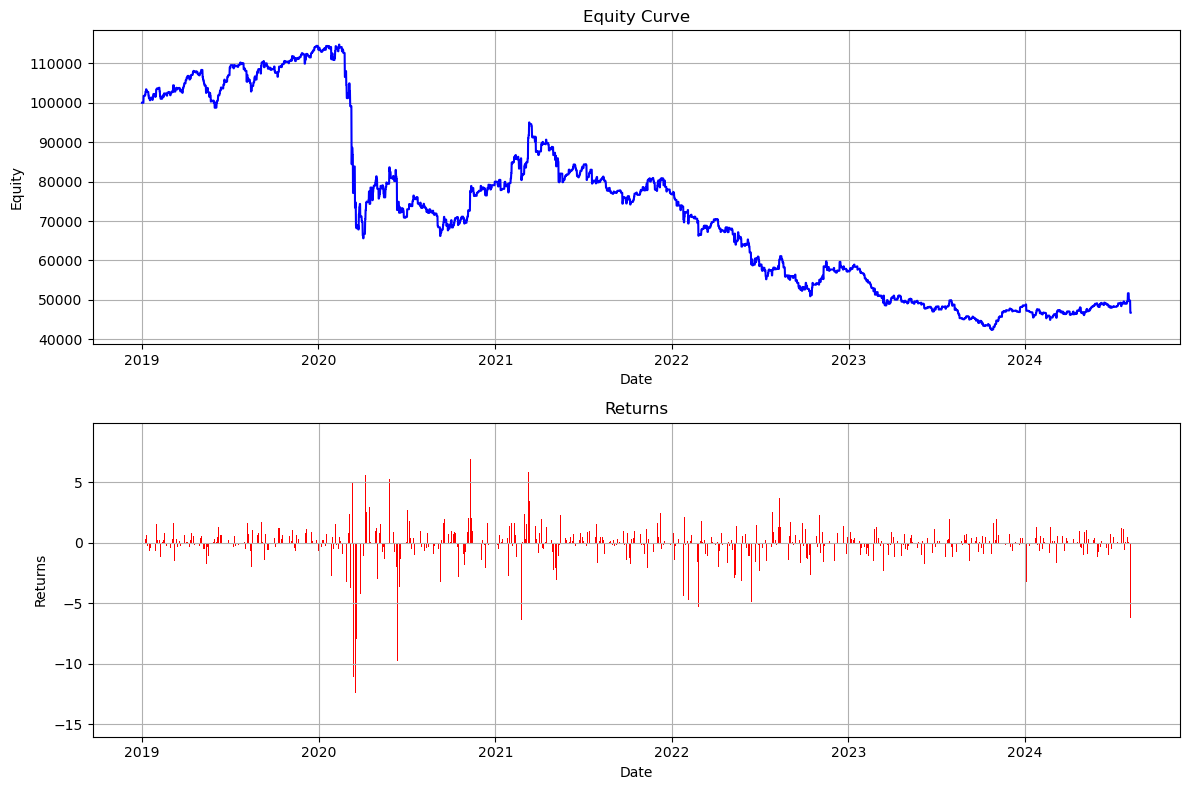

In [227]:

# Convert to DataFrame
equity_values = backtest_result['charts']['Strategy Equity']['series']['Equity']['values']
return_values = backtest_result['charts']['Strategy Equity']['series']['Return']['values']

# Assuming equity_values has 5 elements and return_values has 2
equity_df = pd.DataFrame(equity_values, columns=['Timestamp', 'Open', 'High', 'Low', 'Close'])
return_df = pd.DataFrame(return_values, columns=['Timestamp', 'Return'])

# Convert Unix timestamps to human-readable dates
equity_df['Date'] = pd.to_datetime(equity_df['Timestamp'], unit='s')
return_df['Date'] = pd.to_datetime(return_df['Timestamp'], unit='s')

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Equity curve on the first subplot using the 'Close' value
ax1.plot(equity_df['Date'], equity_df['Close'], label='Equity Curve', color='blue')
ax1.set_title('Equity Curve')
ax1.set_xlabel('Date')
ax1.set_ylabel('Equity')
ax1.grid(True)

# Returns on the second subplot
ax2.bar(return_df['Date'], return_df['Return'], label='Daily Returns', color='red')
ax2.set_title('Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Returns')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [208]:
backtest_result['charts']['Assets Sales Volume']

{'name': 'Assets Sales Volume'}

In [205]:
backtest_result['charts'].keys()

dict_keys(['Strategy Equity', 'Benchmark', 'Portfolio Margin', 'Assets Sales Volume', 'Portfolio Turnover', 'Capacity', 'Exposure', 'Drawdown'])

In [182]:
len(backtest_result['charts'])

8

In [56]:
fetch_project_details(project_id=19016182)['name']

'QP_97HalfDayReversal'

In [154]:
# 'outOfSampleMaxEndDate', 'outOfSampleDays' are empty 

In [57]:
backtest_keys = ['name', 'projectId', 'backtestId', 'tradeableDates', 'backtestStart', 'backtestEnd', ]

In [59]:
aggregated_keys = {prefix: [key for key in backtest_result['rollingWindow'].keys() if key.startswith(prefix)] for prefix in ['M1_', 'M3_', 'M6_', 'M12_']}

for k in aggregated_keys.keys():
    print(k, ' :: ', len(aggregated_keys[k]))


M1_  ::  68
M3_  ::  68
M6_  ::  68
M12_  ::  68


### Each key in rollingWindow such as 'M1_20190131' has 3 sub keys:
backtest_result['rollingWindow']['M1_20190131']['portfolioStatistics'].keys()


    1. tradeStatistics
    2. portfolioStatistics
    3. closedTrades

1. tradeStatistics Keys: ['startDateTime', 'endDateTime', 'totalNumberOfTrades', 'numberOfWinningTrades', 'numberOfLosingTrades', 'totalProfitLoss', 'totalProfit', 'totalLoss', 'largestProfit', 'largestLoss', 'averageProfitLoss', 'averageProfit', 'averageLoss', 'averageTradeDuration', 'averageWinningTradeDuration', 'averageLosingTradeDuration', 'medianTradeDuration', 'medianWinningTradeDuration', 'medianLosingTradeDuration', 'maxConsecutiveWinningTrades', 'maxConsecutiveLosingTrades', 'profitLossRatio', 'winLossRatio', 'winRate', 'lossRate', 'averageMAE', 'averageMFE', 'largestMAE', 'largestMFE', 'maximumClosedTradeDrawdown', 'maximumIntraTradeDrawdown', 'profitLossStandardDeviation', 'profitLossDownsideDeviation', 'profitFactor', 'sharpeRatio', 'sortinoRatio', 'profitToMaxDrawdownRatio', 'maximumEndTradeDrawdown', 'averageEndTradeDrawdown', 'maximumDrawdownDuration', 'totalFees']


2. portfolioStatistics Keys : ['averageWinRate', 'averageLossRate', 'profitLossRatio', 'winRate', 'lossRate', 'expectancy', 'startEquity', 'endEquity', 'compoundingAnnualReturn', 'drawdown', 'totalNetProfit', 'sharpeRatio', 'probabilisticSharpeRatio', 'sortinoRatio', 'alpha', 'beta', 'annualStandardDeviation', 'annualVariance', 'informationRatio', 'trackingError', 'treynorRatio', 'portfolioTurnover', 'valueAtRisk99', 'valueAtRisk95']

3. Issue is getting empty closedTrades for all rollingWindow keys such as backtest_result['rollingWindow']['M1_20190131']['closedTrades']


In [70]:
# merges all values of tradeStatistics and portfolioStatistics with each key as a row (eg. 'M1_20190131') in backtest_result['rollingWindow']
data = []
for key, value in backtest_result['rollingWindow'].items():
    row = {'Date': key, **value['tradeStatistics'], **value['portfolioStatistics']}
    data.append(row)

df = pd.DataFrame(data)
df.head(3)

,Date,startDateTime,endDateTime,totalNumberOfTrades,numberOfWinningTrades,numberOfLosingTrades,totalProfitLoss,totalProfit,totalLoss,largestProfit,largestLoss,averageProfitLoss,averageProfit,averageLoss,averageTradeDuration,averageWinningTradeDuration,averageLosingTradeDuration,medianTradeDuration,medianWinningTradeDuration,medianLosingTradeDuration,maxConsecutiveWinningTrades,maxConsecutiveLosingTrades,profitLossRatio,winLossRatio,winRate,lossRate,averageMAE,averageMFE,largestMAE,largestMFE,maximumClosedTradeDrawdown,maximumIntraTradeDrawdown,profitLossStandardDeviation,profitLossDownsideDeviation,profitFactor,sharpeRatio,sortinoRatio,profitToMaxDrawdownRatio,maximumEndTradeDrawdown,averageEndTradeDrawdown,maximumDrawdownDuration,totalFees,averageWinRate,averageLossRate,expectancy,startEquity,endEquity,compoundingAnnualReturn,drawdown,totalNetProfit,probabilisticSharpeRatio,alpha,beta,annualStandardDeviation,annualVariance,informationRatio,trackingError,treynorRatio,portfolioTurnover,valueAtRisk99,valueAtRisk95
0,M1_20190131,2019-01-03T21:00:00Z,2019-01-31T15:00:00Z,564,314,250,3639.87,10614.30,-6974.43,411.75,-809.19,6.4537,33.8035,-27.8977,1.05:24:15.3191570,22:35:09.5541469,1.13:58:04.8000011,18:00:00,18:00:00,18:00:00,29,34,1.1966,1.256,0.5550,0.4450,-19.5538,34.2707,-847.58,601.94,-2858.82,-2910.07,62.4613,66.1793,1.5219,3.2518,6.3255,1.2732,-809.19,-27.8170,21.00:00:00,191.2980,0.0003,-0.0003,0.2190,100000,103448.5507,0.4996,0.027,0.0345,0.7772,0.0030,0.3858,0.0959,0.0092,-4.0293,0.1214,0.8088,1.2167,-0.013,-0.009
1,M1_20190228,2019-01-31T21:00:00Z,2019-02-28T15:00:00Z,568,239,329,-1346.06,6090.08,-7436.14,302.34,-312.09,-2.3698,25.4815,-22.6022,1.05:19:26.1971918,1.04:44:41.1715509,1.05:44:40.8510690,18:00:00,18:00:00,18:00:00,19,25,1.1141,0.7264,0.4173,0.5827,-22.9705,20.9122,-312.09,398.45,-2881.42,-3040.24,41.2807,31.2417,0.8190,-2.1383,-2.4245,-0.4672,-312.09,-23.2820,4.00:00:00,190.9436,0.0002,-0.0002,-0.1179,103443.471,101911.5728,-0.1801,0.027,-0.0148,0.1822,-0.4181,0.7687,0.0683,0.0047,-10.9774,0.0455,-0.1900,1.3330,-0.011,-0.008
2,M1_20190331,2019-02-28T21:00:00Z,2019-03-29T14:00:00Z,624,357,267,3230.15,10241.52,-7011.37,2094.2,-387.8,5.1765,28.6877,-26.2598,1.03:06:20.7692410,1.03:44:52.4369813,1.02:14:49.8876438,18:00:00,18:00:00,18:00:00,29,19,1.0900,1.3371,0.5673,0.4327,-26.4981,27.6348,-403.20,2597.40,-2221.60,-2857.67,103.5657,46.2039,1.4607,2.2014,2.4662,1.4540,-806.40,-22.4583,21.23:00:00,213.4913,0.0003,-0.0003,0.1857,101906.5591,104923.1277,0.4268,0.018,0.0296,0.6680,0.1856,0.0436,0.0860,0.0074,0.8401,0.1272,4.3369,1.3959,-0.012,-0.008


### runtimeStatistics

In [72]:
backtest_result['runtimeStatistics']

{'Equity': '$46,717.60',
 'Fees': '-$9,892.08',
 'Holdings': '$43,612.00',
 'Net Profit': '$-53,282.40',
 'Probabilistic Sharpe Ratio': '0.002%',
 'Return': '-53.28 %',
 'Unrealized': '$-2.18',
 'Volume': '$197,886,426.77'}

### statistics

In [78]:
# For a Specific Backtest for a specific Project
backtest_result['statistics']

{'Total Orders': '82281',
 'Average Win': '0.04%',
 'Average Loss': '-0.05%',
 'Compounding Annual Return': '-12.707%',
 'Drawdown': '63.100%',
 'Expectancy': '-0.040',
 'Start Equity': '100000',
 'End Equity': '46717.60',
 'Net Profit': '-53.282%',
 'Sharpe Ratio': '-0.528',
 'Sortino Ratio': '-0.461',
 'Probabilistic Sharpe Ratio': '0.002%',
 'Loss Rate': '49%',
 'Win Rate': '51%',
 'Profit-Loss Ratio': '0.87',
 'Alpha': '-0.162',
 'Beta': '0.661',
 'Annual Standard Deviation': '0.186',
 'Annual Variance': '0.035',
 'Information Ratio': '-1.218',
 'Tracking Error': '0.16',
 'Treynor Ratio': '-0.149',
 'Total Fees': '$9892.08',
 'Estimated Strategy Capacity': '$11000000.00',
 'Lowest Capacity Asset': 'BURL VKET4LM50ZFP',
 'Portfolio Turnover': '132.13%'}

## totalPerformance

In [156]:
backtest_result['totalPerformance'].keys()

dict_keys(['tradeStatistics', 'portfolioStatistics', 'closedTrades'])

### 'totalPerformance' >> 'closedTrades'

direction is 0 always for some reason

In [ ]:
print(len(backtest_result['totalPerformance']['closedTrades']))
backtest_result['totalPerformance']['closedTrades'][0]

In [155]:
df = pd.DataFrame([{**{f'symbol_{k}': v for k, v in t.get('symbol', {}).items()}, **t} for t in backtest_result['totalPerformance']['closedTrades']])
df.drop(columns=['symbol', 'direction','symbol_value','symbol_id'], inplace=True)
# df.sort_values(['entryTime','exitTime'], inplace=True)
df


,symbol_permtick,entryTime,entryPrice,quantity,exitTime,exitPrice,profitLoss,totalFees,mae,mfe,duration,endTradeDrawdown,isWin
0,WP,2019-01-03T21:00:00Z,72.470000,45,2019-01-04T15:00:00Z,73.600000,50.85,0.328815,0.00,54.00,18:00:00,-3.15,True
1,GM,2019-01-03T21:00:00Z,29.947524,111,2019-01-04T15:00:00Z,30.458257,56.69,0.335252,0.00,56.69,18:00:00,0.00,True
2,EL,2019-01-03T21:00:00Z,118.468356,28,2019-01-04T15:00:00Z,120.165070,47.51,0.335921,0.00,84.19,18:00:00,-36.68,True
3,MGM,2019-01-03T21:00:00Z,24.051422,137,2019-01-04T15:00:00Z,24.791466,101.39,0.335174,0.00,113.39,18:00:00,-12.00,True
4,WDC,2019-01-03T21:00:00Z,33.835329,98,2019-01-04T15:00:00Z,34.736972,88.36,0.336004,0.00,88.36,18:00:00,0.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41100,ROKU,2024-08-02T20:00:00Z,53.140000,31,2024-08-05T14:00:00Z,49.850000,-101.99,0.158983,-115.01,0.00,2.18:00:00,-101.99,False
41101,MRNA,2024-08-02T20:00:00Z,86.580000,19,2024-08-05T14:00:00Z,80.210000,-121.03,0.161994,-121.03,0.00,2.18:00:00,-121.03,False
41102,ASTS,2024-08-02T20:00:00Z,18.510000,90,2024-08-05T14:00:00Z,17.950000,-50.40,0.168435,-50.40,36.90,2.18:00:00,-87.30,False
41103,PRU,2024-08-02T20:00:00Z,110.260000,15,2024-08-05T14:00:00Z,108.170000,-31.35,0.161760,-72.60,0.00,2.18:00:00,-31.35,False


/Users/faisal/miniconda3/envs/pytorchbook/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


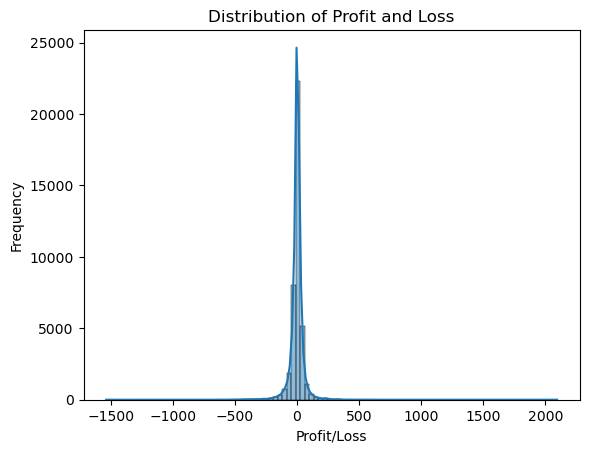

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['profitLoss'], kde=True, bins=100)
plt.title('Distribution of Profit and Loss')
plt.xlabel('Profit/Loss')
plt.ylabel('Frequency')
plt.show()


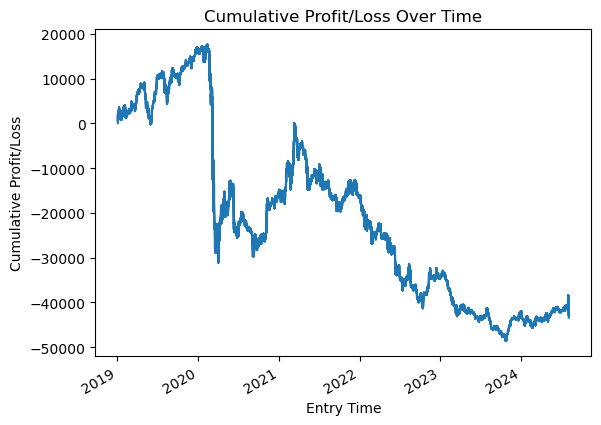

In [167]:
# Assuming 'entryTime' and 'exitTime' are properly formatted as datetime
df['entryTime'] = pd.to_datetime(df['entryTime'])
df.set_index('entryTime', inplace=True)
df['profitLoss'].cumsum().plot()
plt.title('Cumulative Profit/Loss Over Time')
plt.ylabel('Cumulative Profit/Loss')
plt.xlabel('Entry Time')
plt.show()


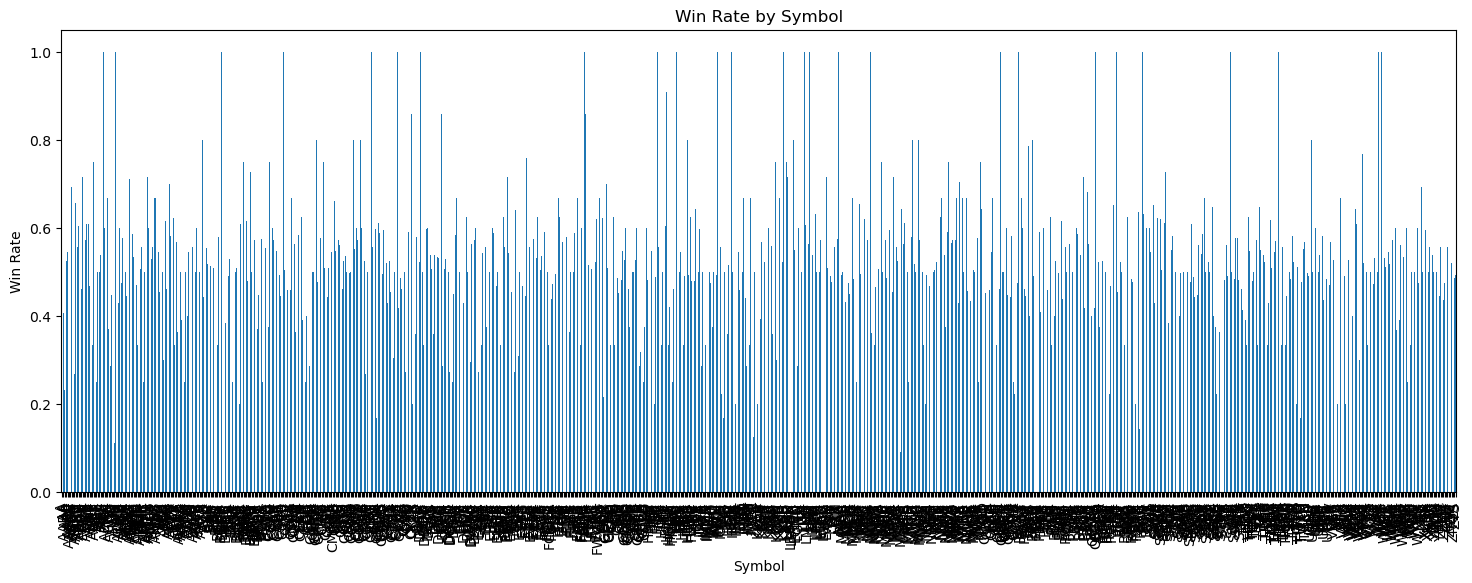

In [171]:
win_rates = df.groupby('symbol_permtick')['isWin'].mean()
win_rates.plot(kind='bar', figsize=(18,6))
plt.title('Win Rate by Symbol')
plt.ylabel('Win Rate')
plt.xlabel('Symbol')
plt.show()


### Example for a Hypothetical Statistical Test:
If the hypothesis is that "Win rates are significantly different across symbols," you could perform a test like this:

In [173]:
from scipy.stats import chi2_contingency

# Creating a contingency table of win and loss counts by symbol
contingency_table = df.pivot_table(index='symbol_permtick', columns='isWin', aggfunc='size', fill_value=0)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Test result: Chi2 = {chi2}, p-value = {p_value}")

Chi-Squared Test result: Chi2 = 1154.471747446111, p-value = 0.0013476400876359519


In [174]:
contingency_table

isWin,False,True
symbol_permtick,,
A,10,13
AA,44,30
AABA,10,3
AAL,114,126
AAP,10,12
...,...,...
ZION,1,0
ZM,78,84
ZNGA,8,11


### Chi-Squared Test for Win Rates
This test can analyze if the win rate of a trading strategy is different from what would be expected by chance.

Hypothesis: The win rate of the strategy is significantly higher than 50% (or another benchmark percentage).
Test Method: Create a contingency table of wins and losses and apply the chi-squared test.


In [175]:
import pandas as pd

# Assuming your DataFrame is named df and has a column 'isWin' where True indicates a win and False a loss.
win_count = df['isWin'].sum()
loss_count = len(df) - win_count

# Create the contingency table
observed = [win_count, loss_count]
observed


[21270, 19835]

In [177]:
total_trades = len(df)
expected = [total_trades / 2, total_trades / 2]  # 50% wins, 50% losses
expected


[20552.5, 20552.5]

In [179]:
from scipy.stats import chisquare

chi2_stat, p_val = chisquare(observed, f_exp=expected)
print(f"Chi-squared Statistic: {chi2_stat}, P-value: {p_val}")


Chi-squared Statistic: 50.0967035640433, P-value: 1.4635264761262978e-12


### 'totalPerformance' >> 'tradeStatistics'

In [81]:
backtest_result['totalPerformance']['tradeStatistics']

{'startDateTime': '2019-01-03T21:00:00Z',
 'endDateTime': '2024-08-05T14:00:00Z',
 'totalNumberOfTrades': 41105,
 'numberOfWinningTrades': 21270,
 'numberOfLosingTrades': 19835,
 'totalProfitLoss': '-43390.16',
 'totalProfit': '604426.74',
 'totalLoss': '-647816.90',
 'largestProfit': '2094.2',
 'largestLoss': '-1536.45',
 'averageProfitLoss': '-1.0556',
 'averageProfit': '28.4169',
 'averageLoss': '-32.6603',
 'averageTradeDuration': '1.04:38:42.1122636',
 'averageWinningTradeDuration': '1.04:00:43.1596936',
 'averageLosingTradeDuration': '1.05:19:25.9392759',
 'medianTradeDuration': '18:00:00',
 'medianWinningTradeDuration': '18:00:00',
 'medianLosingTradeDuration': '18:00:00',
 'maxConsecutiveWinningTrades': 61,
 'maxConsecutiveLosingTrades': 67,
 'profitLossRatio': '0.8701',
 'winLossRatio': '1.0723',
 'winRate': '0.5175',
 'lossRate': '0.4825',
 'averageMAE': '-27.0011',
 'averageMFE': '25.2907',
 'largestMAE': '-1536.45',
 'largestMFE': '2597.40',
 'maximumClosedTradeDrawdown': '

### 'totalPerformance' >> 'portfolioStatistics'

In [82]:
backtest_result['totalPerformance']['portfolioStatistics']

{'averageWinRate': '0.0004',
 'averageLossRate': '-0.0005',
 'profitLossRatio': '0.8672',
 'winRate': '0.5140',
 'lossRate': '0.4860',
 'expectancy': '-0.0403',
 'startEquity': '100000',
 'endEquity': '46717.6019',
 'compoundingAnnualReturn': '-0.1271',
 'drawdown': '0.631',
 'totalNetProfit': '-0.5328',
 'sharpeRatio': '-0.5281',
 'probabilisticSharpeRatio': '0.0000',
 'sortinoRatio': '-0.4614',
 'alpha': '-0.1622',
 'beta': '0.6607',
 'annualStandardDeviation': '0.1862',
 'annualVariance': '0.0347',
 'informationRatio': '-1.2183',
 'trackingError': '0.1600',
 'treynorRatio': '-0.1489',
 'portfolioTurnover': '1.3213',
 'valueAtRisk99': '-0.020',
 'valueAtRisk95': '-0.014'}

In [ ]:
# , 'charts'

backtest_keys = ['rollingWindow']
#  'rollingWindow', 'runtimeStatistics', 'statistics', 'totalPerformance', 'nodeName', 'outOfSampleMaxEndDate', 'outOfSampleDays']

for k in backtest_keys:
    print(k,backtest_result[k],'\n')

{'Equity': '$46,717.60',
 'Fees': '-$9,892.08',
 'Holdings': '$43,612.00',
 'Net Profit': '$-53,282.40',
 'Probabilistic Sharpe Ratio': '0.002%',
 'Return': '-53.28 %',
 'Unrealized': '$-2.18',
 'Volume': '$197,886,426.77'}

In [230]:


def fetch_project_details(project_id):
    headers = get_authenticated_headers()
    # Send the projectId in the request body as you do for backtests
    response = requests.post(url_readProject, headers=headers, data={'projectId': project_id})
    if response.status_code == 200:
        return response.json()['projects'][0]  # Assuming 'projects' contains the list of project details
    else:
        print("Failed to retrieve project details:", response.status_code, response.text)
        return None

fetch_project_details(19014068)['name']

'QP_609IntradayReversalinUS'

In [ ]:
backtestList['success']

In [ ]:
backtestList['projects'][0].keys()

In [ ]:
backtestList

    # backtest_data['backtest'].keys(): dict_keys(['note', 'name', 'organizationId', 'projectId', 'completed', 'optimizationId', 'backtestId', 'tradeableDates', 'researchGuide', 'backtestStart', 'backtestEnd', 'created', 'snapshotId', 'status', 'error', 'stacktrace', 'progress', 'hasInitializeError', 'charts', 'parameterSet', 'rollingWindow', 'runtimeStatistics', 'statistics', 'totalPerformance', 'nodeName', 'outOfSampleMaxEndDate', 'outOfSampleDays'])

In [76]:

# Initialize dictionaries to store results
data_ytd, data_2023, data_5yr = {}, {}, {}

# Loop through each project and timeframe, fetch results, and store them
for project_id, timeframes in projects.items():
    project_name = fetch_project_details(project_id)['name'][3:]  # Fetch the project name once per project ID
    
    for timeframe, backtest_id in timeframes.items():
        
        result = fetch_backtest_result(project_id, backtest_id, key='statistics')
        if result:
            if timeframe == 'YTD':
                data_ytd[project_name] = result
            elif timeframe == '2023':
                data_2023[project_name] = result
            elif timeframe == '5YR':
                data_5yr[project_name] = result

# Convert the results into DataFrames
df_ytd = pd.DataFrame.from_dict(data_ytd, orient='index')
df_2023 = pd.DataFrame.from_dict(data_2023, orient='index')
df_5yr = pd.DataFrame.from_dict(data_5yr, orient='index')


In [39]:
project_name

'1016IntradayMomentumStrategyforSP500ETF'

In [77]:
df_ytd

,Total Orders,Average Win,Average Loss,Compounding Annual Return,Drawdown,Expectancy,Start Equity,End Equity,Net Profit,Sharpe Ratio,Sortino Ratio,Probabilistic Sharpe Ratio,Loss Rate,Win Rate,Profit-Loss Ratio,Alpha,Beta,Annual Standard Deviation,Annual Variance,Information Ratio,Tracking Error,Treynor Ratio,Total Fees,Estimated Strategy Capacity,Lowest Capacity Asset,Portfolio Turnover
97HalfDayReversal,8698,0.03%,-0.04%,-2.306%,9.700%,-0.008,100000,98616.64,-1.383%,-0.439,-0.399,16.596%,47%,53%,0.88,-0.109,0.766,0.14,0.02,-1.045,0.118,-0.08,$1423.88,$12000000.00,BURL VKET4LM50ZFP,130.46%
609IntradayReversalinUS,5252,0.04%,-0.04%,-14.237%,9.500%,-0.092,100000,91237.01,-8.763%,-3.162,-3.22,0.077%,55%,45%,1.03,-0.154,-0.012,0.049,0.002,-1.91,0.114,13.391,$0.00,$460000000.00,CAVA Y9BDZUN6412D,267.91%
300OvernightMomentumStrategy,3918,0.15%,-0.12%,32.044%,13.200%,0.080,100000,118055.39,18.055%,0.96,0.906,54.601%,52%,48%,1.25,0.133,0.736,0.186,0.035,0.674,0.173,0.243,$3072.18,$540000000.00,ORCL R735QTJ8XC9X,226.95%
1016IntradayMomentumStrategyforSP500ETF,187,1.17%,-0.57%,27.177%,7.600%,0.262,100000,115412.01,15.412%,1.122,1.09,66.393%,59%,41%,2.05,0.107,0.437,0.12,0.014,0.577,0.125,0.308,$699.90,$17000000.00,SPY R735QTJ8XC9X,306.54%


In [ ]:
df_2023

In [ ]:
df_5yr